<a href="https://colab.research.google.com/github/rj0043913/machine_learning_examples/blob/master/cats_dogs_batchnormali_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 39kB/s 
     |████████████████████████████████| 501kB 46.1MB/s 
     |████████████████████████████████| 4.3MB 44.2MB/s 


In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,ZeroPadding2D,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
import numpy as np

In [0]:
!git clone https://github.com/laxmimerit/dog-cat-full-dataset.git

Cloning into 'dog-cat-full-dataset'...
remote: Enumerating objects: 25027, done.
remote: Total 25027 (delta 0), reused 0 (delta 0), pack-reused 25027
Receiving objects: 100% (25027/25027), 541.62 MiB | 38.80 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Checking out files: 100% (25001/25001), done.


In [0]:
print(tf.__version__)

2.0.0-rc0


In [0]:
train_data_dir = '/content/dog-cat-full-dataset/data/train/'
test_data_dir  = '/content/dog-cat-full-dataset/data/test/'

In [0]:
datagen =ImageDataGenerator(rescale=1./255)
image_height=32
image_width = 32
batch_size =20

In [0]:
train_generator = datagen.flow_from_directory(directory=train_data_dir,target_size=(image_height,image_width),classes=['dogs','cats'],class_mode='binary',batch_size=batch_size)
validation_generator = datagen.flow_from_directory(directory=test_data_dir,target_size=(image_height,image_width),class_mode='binary',classes=['dogs','cats'],batch_size=batch_size)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [0]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [0]:
len(train_generator)*batch_size

20000

##model building CMM 


In [0]:
model = Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform',input_shape=(image_height,image_width,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model = Sequential()
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model=Sequential()
model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units=128,activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))



In [0]:
opt = SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit_generator(generator=train_generator,steps_per_epoch=len(train_generator),epochs=10,validation_data=validation_generator,validation_steps=len(validation_generator),verbose=1,)

Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
1000/1000 [==============================] - 359s 359ms/step - loss: 0.6810 - accuracy: 0.6019 - val_loss: 0.6142 - val_accuracy: 0.6716
Epoch 2/10
1000/1000 [==============================] - 357s 357ms/step - loss: 0.5927 - accuracy: 0.6882 - val_loss: 0.5482 - val_accuracy: 0.7324
Epoch 3/10
1000/1000 [==============================] - 357s 357ms/step - loss: 0.5506 - accuracy: 0.7178 - val_loss: 0.5319 - val_accuracy: 0.7484
Epoch 4/10
1000/1000 [==============================] - 359s 359ms/step - loss: 0.5243 - accuracy: 0.7457 - val_loss: 0.5580 - val_accuracy: 0.7300
Epoch 5/10
1000/1000 [==============================] - 354s 354ms/step - loss: 0.5054 - accuracy: 0.7612 - val_loss: 0.5157 - val_accuracy: 0.7520
Epoch 6/10
1000/1000 [==============================] - 355s 355ms/step - loss: 0.4986 - accuracy: 0.7668 - val_loss: 0.4999 - val_accuracy: 0.7662
Epoch 7/10
1000/10

In [0]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

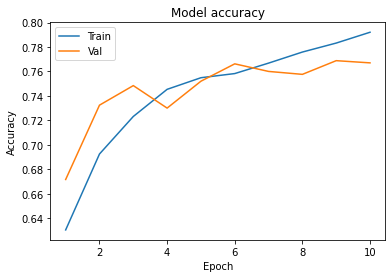

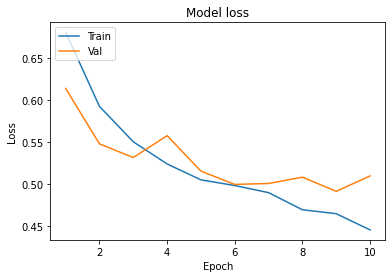

In [0]:
plot_learningCurve(history,10)